In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# 第1章 線形回帰


## 1.1 最小二乗法
---
以下$N \in \mathbb{N}$とする．

$
    x = 
    \begin{pmatrix}
        x_1\\
        x_2\\
        \cdots\\
        x_N
    \end{pmatrix},\, 
    y = 
    \begin{pmatrix}
        y_1\\
        y_2\\
        \cdots\\
        y_N
    \end{pmatrix}
    \in \mathbb{R}^{N}
$
に対し，近似的に
$
    y = \beta_1 x + \beta_0 \cdot 1\, (i = 1, \dots, N)
$
となる$\beta_0, \beta_1 \in \mathbb{R}$を求めよう．ここで $1$はずべての成分が$1$の$\mathbb{R}^{N}$の元である．
このとき，

$$
    \| y - \beta_1 x + \beta_0 \cdot 1 \|^2 = \sum_{i=1}^{N} (y_i - (\beta_1x_i + \beta_0))^2
$$

を最小化する$\beta_1, \beta_0$で近似することを考える．これを**最小二乗法**という．いま，$L(\beta_0, \beta_1) =  \sum_{i=1}^{N} (y_i - (\beta_1x_i + \beta_0))^2 \in \mathbb{R}[\beta_0, \beta_1]$とみなして，これを最小化する問題と考えよう．

$$
\begin{align}
L(a, b) \text{が極値} \Rightarrow \frac{\partial L}{\partial \beta_0} = \frac{\partial L}{\partial \beta_1}=0
\end{align}
$$

であるからこれを満たすような$\beta_0, \beta_1$を求める．



### Ex

$
    x = 
    \begin{pmatrix}
        1\\
        2
    \end{pmatrix},\, 
    y = 
    \begin{pmatrix}
        3\\
        6
    \end{pmatrix}
    \in \mathbb{R}^{2}
$
とする．
$  
    \begin{pmatrix}
        3\\
        6
    \end{pmatrix}
    = \beta_1
    \begin{pmatrix}
        1\\
        2
    \end{pmatrix}
    + \beta_0
    \begin{pmatrix}
        1\\
        1
    \end{pmatrix}
$
を満たすような$\beta_0, \beta_1 \in \mathbb{R}$を求める (明らかに$\beta_0 = 0, \beta_1 = 3$はこれを満たすが，一般化する際の計算の練習として)．この時，
$
    L = (3 - \beta_1 - \beta_0)^2 + (6 - 2\beta_1 - \beta_0)^2
$
である．$\frac{\partial L}{\partial \beta_0} = 0$とすると，
$$
    \begin{align}
        -2(3 - \beta_1 - \beta_0) - 2(6 - 2\beta_1 - \beta_0) &= 0\\
        6\beta_1 + 4\beta_0 -18 &= 0\\
        \therefore \beta_0 = \frac{1}{4}(-6\beta_1 + 18) 
    \end{align}
$$

これを
$$
    \begin{align}
        \frac{\partial L}{\partial \beta_0} 
        &= -2(3 - \beta_1 - \beta_0) + 4(6 - 2\beta_1 - \beta_0)\\
        &= -2\beta_0 -6 \beta_1 + 18
    \end{align}
$$

に代入して，$\frac{\partial L}{\partial \beta_0} = 0$とすると，

$$
    \begin{align}
        -2\beta_0 -6 \beta_1 + 18 &= 0\\
        -2\left(\frac{1}{4}(-6\beta_1 + 18)\right) 
        -6\beta_1 
        + 18 &= 0\\
        \therefore \beta_1 = 3
    \end{align}
$$

よって$\beta_0 = 0$


### General Setting
$$
    \begin{align}
        \frac{\partial L}{\partial \beta_0} 
        &= -2\sum(y_i - (\beta_1 x_i + \beta_0))\\
        \frac{\partial L}{\partial \beta_1} 
        &= -2\sum x_i(y_i - (\beta_1 x_i + \beta_0))
    \end{align}
$$
- $\frac{\partial L}{\partial \beta_0} = 0$ とする．このとき，

$$
    \begin{align}
        -2\sum(y_i - (\beta_1 x_i + \beta_0)) &= 0\\
        \sum(y_i - (\beta_1 x_i)) - \sum \beta_0 &= 0\\
        \therefore \beta_0 = \frac{1}{n}\sum(y_i - \beta_1 x_i)
    \end{align}
$$

- $\frac{\partial L}{\partial \beta_1} = 0$とすると，$\sum x_i(y_i - (\beta_1 x_i + \beta_0)) = 0$. この左辺に，$\beta_0 = \frac{1}{n}\sum(y_i - \beta_1 x_i)$を代入する．
$$
    \begin{align}
        &\sum x_i(y_i - (\beta_1 x_i + \beta_0))\\ 
        &= \sum (x_iy_i - \beta_1 x_i^2 - \beta_0 x_i)\\ 
        &= \sum x_iy_i 
            - \sum\beta_1 x_i^2 
            - \frac{1}{n}\sum(y_i - \beta_1 x_i) \sum x_i\\  
        &= \sum x_iy_i 
            - \sum \beta_1 x_i^2 
            - \frac{1}{n}\sum y_i \sum x_i 
            + \frac{\beta_1}{n} \left(\sum x_i\right)^2\\  
        &= \beta_1\left( \frac{1}{n}\left(\sum x_i\right)^2 -  \sum x_i^2 \right)
            + \sum x_iy_i  - \frac{1}{n}\sum y_i \sum x_i 
    \end{align}
$$

よってこのとき，$\frac{\partial L}{\partial \beta_1} = 0$を$\beta_1$について解くと，$\frac{1}{n}\left(\sum x_i\right)^2 - \sum x_i^2 \neq 0$の時，
$$
    \beta_1 = \frac{\frac{1}{n}\sum y_i \sum x_i - \sum x_iy_i}{\frac{1}{n}\left(\sum x_i\right)^2 -  \sum x_i^2}
$$
となる．

ここで，$\bar{x} := \frac{1}{n}\sum x_i, \bar{y} := \frac{1}{n}\sum y_i$という記法を導入しすると，

$$
    \begin{align}
        \beta_0 &= \bar{y} - \beta_1 \bar{x}\\
        \beta_1 &= \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i -\bar{x})^2}
    \end{align}
$$

とかける．すなわち$\beta_1$は共分散と分散でかける．

### Remark
See https://twitter.com/genkuroki/status/1172141055342346243


### Ex19
ランダムに生成したデータに関して，最小二乗法で回帰直線を求める

In [0]:
def min_sq(x, y):
    """
        Input: A pair of vectors in \mathbb{R}^n (x, y),
        Output: - coefficients \beta_0, \beta_1 s.t. y = \beta_1x + \beta_0 estimated by least squares method
                - least square error
    """
    x_mean, y_mean = np.mean(x), np.mean(y)
    
    beta1 = np.dot(x - x_mean, y - y_mean)/np.dot(x - x_mean, x - x_mean)
    beta0 = y_mean - beta1*x_mean

    L = np.dot(y - beta1 * x - beta0, y - beta1 * x - beta0)
    return beta0, beta1, L

In [0]:
def generate_data(size, mean=2, std=1):
    beta1 = np.random.normal(
        loc=mean,
        scale=std,
        size=size,
    )
    beta0 = np.random.randn(1)
    x = np.random.randn(size)
    y = beta1 * x + beta0
    return x, y

In [0]:
def plot_data_and_fitting_line(data_x, data_y, beta0, beta1):
    x = range(-5, 5)
    y = beta1*x + beta0
    
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.scatterplot(
        x=data_x,
        y=data_y,
        alpha=0.8,
        color='grey'
    )
    ax = sns.lineplot(
        x,
        y
    )
    ax.axhline(y=0, c='grey', alpha=0.2)
    ax.axvline(x=0, c='grey', alpha=0.2)

In [0]:
def plot_residual(data_x, data_y, beta0, beta1):
    residual = data_y - beta1*data_x - beta0
    fig, ax = plt.subplots(figsize=(10, 8))
    ax = sns.scatterplot(
        x=range(len(data_y)),
        y=residual,
        alpha=0.8,
    )
    ax.set_title('residual')

beta0 = 0.904617004241945, beta1 = 2.0526206334582358, L = 989.3772821911654


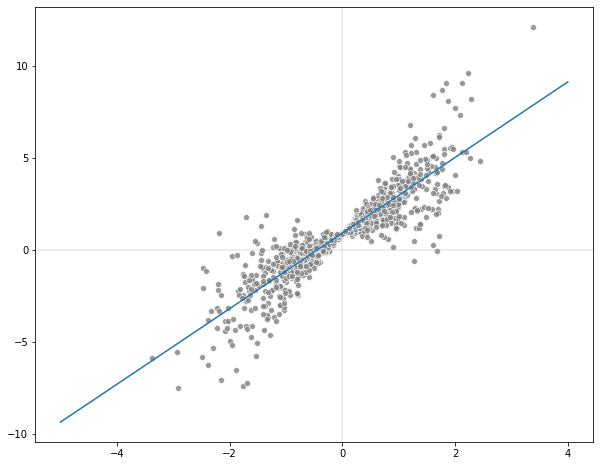

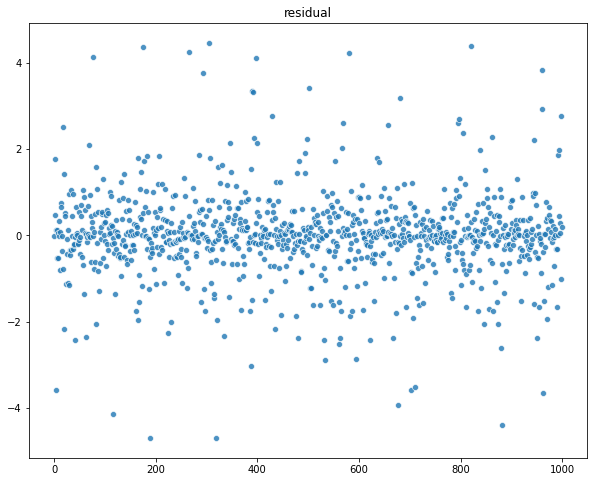

In [83]:
data_x, data_y = generate_data(1000)
beta0, beta1, L = min_sq(data_x, data_y)
print(f'beta0 = {beta0}, beta1 = {beta1}, L = {L}')
plot_data_and_fitting_line(data_x, data_y, beta0, beta1)
plot_residual(data_x, data_y, beta0, beta1)

beta0 = 0.4646852901641971, beta1 = 0.09715394981822381, L = 86909.07234413465


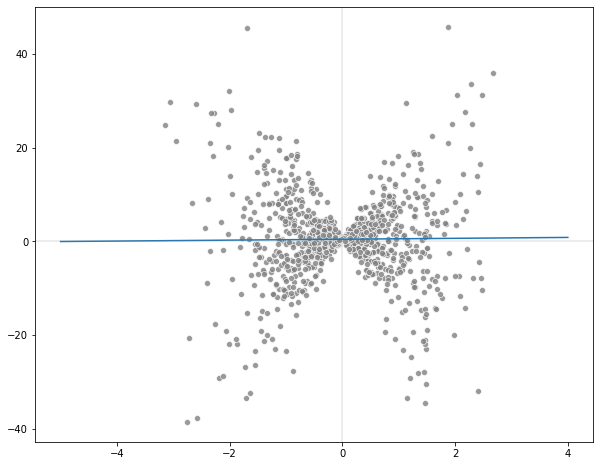

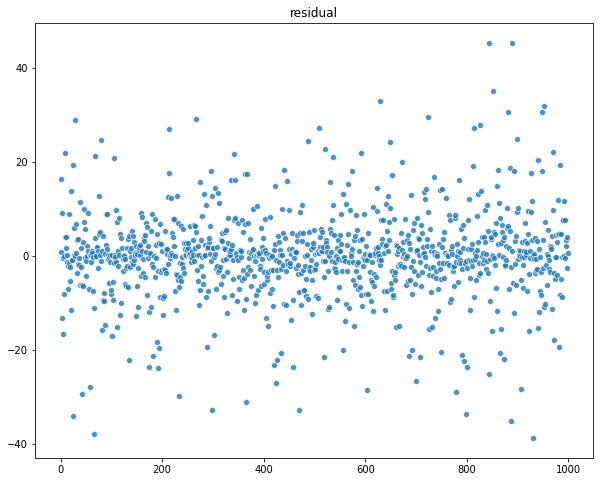

In [84]:
data_x, data_y = generate_data(1000, mean=0, std = 10)
beta0, beta1, L = min_sq(data_x, data_y)
print(f'beta0 = {beta0}, beta1 = {beta1}, L = {L}')
plot_data_and_fitting_line(data_x, data_y, beta0, beta1)
plot_residual(data_x, data_y, beta0, beta1)